# Explore overfitting and underfitting
In this notebook, we'll explore two common regularization techniques—weight regularization and dropout—and use them to improve our IMDB movie review classification notebook.(Text classification with movie reviews.ipynb)

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'1.11.0'

## Download the IMDB dataset

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

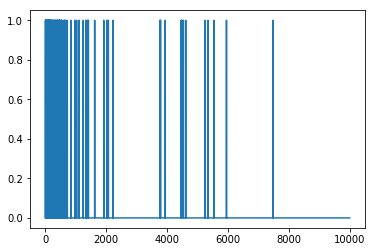

In [4]:
"""Let's look at one of the resulting multi-hot vectors. The word indices are sorted by frequency,
so it is expected that there are more 1-values near index zero, as we can see in this plot:"""

plt.plot(train_data[0])

## Demonstrate overfitting

### Create a baseline model

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4714 - acc: 0.8038 - binary_crossentropy: 0.4714 - val_loss: 0.3288 - val_acc: 0.8770 - val_binary_crossentropy: 0.3288
Epoch 2/20
 - 3s - loss: 0.2437 - acc: 0.9134 - binary_crossentropy: 0.2437 - val_loss: 0.2850 - val_acc: 0.8866 - val_binary_crossentropy: 0.2850
Epoch 3/20
 - 3s - loss: 0.1813 - acc: 0.9374 - binary_crossentropy: 0.1813 - val_loss: 0.2892 - val_acc: 0.8851 - val_binary_crossentropy: 0.2892
Epoch 4/20
 - 3s - loss: 0.1454 - acc: 0.9508 - binary_crossentropy: 0.1454 - val_loss: 0.3125 - val_acc: 0.8793 - val_binary_crossentropy: 0.3125
Epoch 5/20
 - 3s - loss: 0.1199 - acc: 0.9610 - binary_crossentropy: 0.1199 - val_loss: 0.3385 - val_acc: 0.8742 - val_binary_crossentropy: 0.3385
Epoch 6/20
 - 3s - loss: 0.0971 - acc: 0.9706 - binary_crossentropy: 0.0971 - val_loss: 0.3693 - val_acc: 0.8698 - val_binary_crossentropy: 0.3693
Epoch 7/20
 - 3s - loss: 0.0775 - acc: 0.9783 - binary_crossentropy:

### Create a smaller model

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5973 - acc: 0.6751 - binary_crossentropy: 0.5973 - val_loss: 0.5249 - val_acc: 0.7965 - val_binary_crossentropy: 0.5249
Epoch 2/20
 - 3s - loss: 0.4693 - acc: 0.8590 - binary_crossentropy: 0.4693 - val_loss: 0.4658 - val_acc: 0.8612 - val_binary_crossentropy: 0.4658
Epoch 3/20
 - 3s - loss: 0.4083 - acc: 0.9066 - binary_crossentropy: 0.4083 - val_loss: 0.4337 - val_acc: 0.8733 - val_binary_crossentropy: 0.4337
Epoch 4/20
 - 2s - loss: 0.3625 - acc: 0.9318 - binary_crossentropy: 0.3625 - val_loss: 0.4137 - val_acc: 0.8755 - val_binary_crossentropy: 0.4137
Epoch 5/20
 - 2s - loss: 0.3239 - acc: 0.9463 - binary_crossentropy: 0.3239 - val_loss: 0.4047 - val_acc: 0.8713 - val_binary_crossentropy: 0.4047
Epoch 6/20
 - 2s - loss: 0.2897 - acc: 0.9569 - binary_crossentropy: 0.2897 - val_loss: 0.3884 - val_acc: 0.8773 - val_binary_crossentropy: 0.3884
Epoch 7/20
 - 2s - loss: 0.2595 - acc: 0.9641 - binary_crossentropy:

### Create a bigger model

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 17s - loss: 0.3413 - acc: 0.8557 - binary_crossentropy: 0.3413 - val_loss: 0.2937 - val_acc: 0.8809 - val_binary_crossentropy: 0.2937
Epoch 2/20
 - 17s - loss: 0.1354 - acc: 0.9494 - binary_crossentropy: 0.1354 - val_loss: 0.3597 - val_acc: 0.8632 - val_binary_crossentropy: 0.3597
Epoch 3/20
 - 15s - loss: 0.0416 - acc: 0.9879 - binary_crossentropy: 0.0416 - val_loss: 0.4418 - val_acc: 0.8679 - val_binary_crossentropy: 0.4418
Epoch 4/20
 - 15s - loss: 0.0068 - acc: 0.9992 - binary_crossentropy: 0.0068 - val_loss: 0.5911 - val_acc: 0.8688 - val_binary_crossentropy: 0.5911
Epoch 5/20
 - 16s - loss: 7.7246e-04 - acc: 1.0000 - binary_crossentropy: 7.7246e-04 - val_loss: 0.6816 - val_acc: 0.8704 - val_binary_crossentropy: 0.6816
Epoch 6/20
 - 15s - loss: 2.1333e-04 - acc: 1.0000 - binary_crossentropy: 2.1333e-04 - val_loss: 0.7197 - val_acc: 0.8704 - val_binary_crossentropy: 0.7197
Epoch 7/20
 - 15s - loss: 1.3237e-04 - acc: 1.

### Plot the training and validation loss

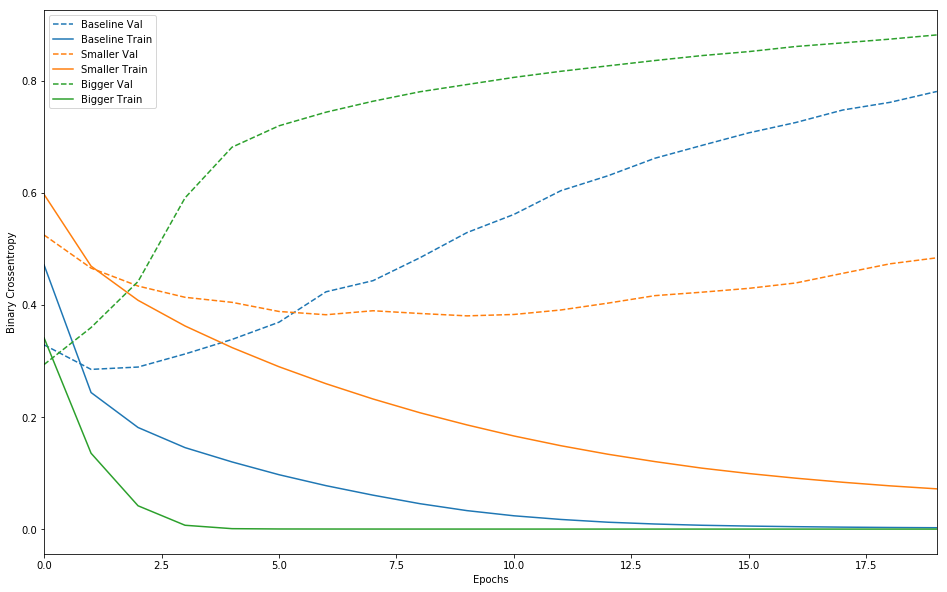

In [11]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Strategies

### Add weight regularization

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5423 - acc: 0.7987 - binary_crossentropy: 0.5039 - val_loss: 0.3923 - val_acc: 0.8749 - val_binary_crossentropy: 0.3510
Epoch 2/20
 - 3s - loss: 0.3141 - acc: 0.9074 - binary_crossentropy: 0.2675 - val_loss: 0.3373 - val_acc: 0.8869 - val_binary_crossentropy: 0.2869
Epoch 3/20
 - 3s - loss: 0.2616 - acc: 0.9258 - binary_crossentropy: 0.2084 - val_loss: 0.3380 - val_acc: 0.8860 - val_binary_crossentropy: 0.2828
Epoch 4/20
 - 3s - loss: 0.2356 - acc: 0.9379 - binary_crossentropy: 0.1788 - val_loss: 0.3498 - val_acc: 0.8828 - val_binary_crossentropy: 0.2921
Epoch 5/20
 - 3s - loss: 0.2221 - acc: 0.9443 - binary_crossentropy: 0.1628 - val_loss: 0.3620 - val_acc: 0.8797 - val_binary_crossentropy: 0.3019
Epoch 6/20
 - 3s - loss: 0.2086 - acc: 0.9501 - binary_crossentropy: 0.1479 - val_loss: 0.3752 - val_acc: 0.8768 - val_binary_crossentropy: 0.3142
Epoch 7/20
 - 3s - loss: 0.2017 - acc: 0.9524 - binary_crossentropy:

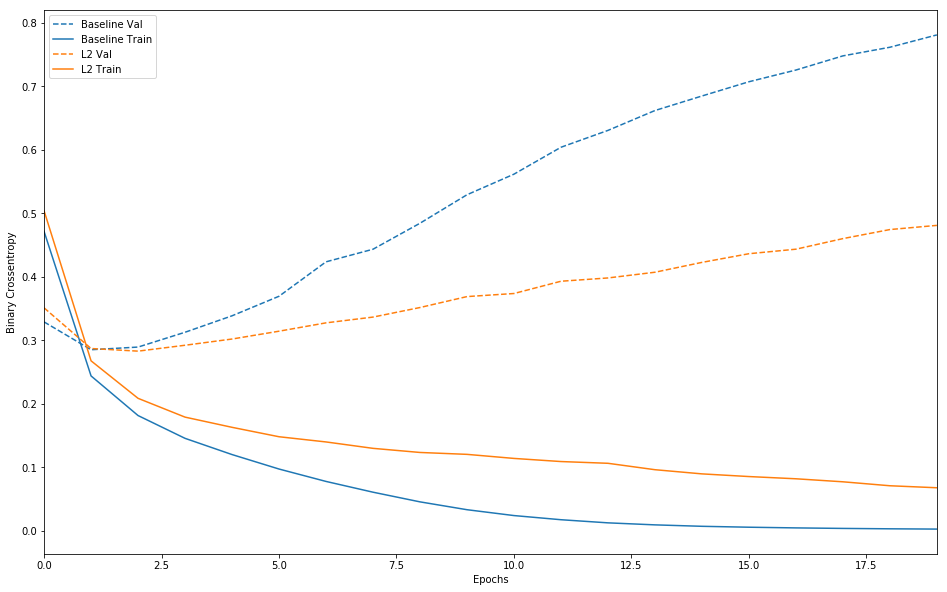

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### Add dropout

In [14]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6595 - acc: 0.6256 - binary_crossentropy: 0.6595 - val_loss: 0.6031 - val_acc: 0.6997 - val_binary_crossentropy: 0.6031
Epoch 2/20
 - 3s - loss: 0.5537 - acc: 0.8003 - binary_crossentropy: 0.5537 - val_loss: 0.5073 - val_acc: 0.8484 - val_binary_crossentropy: 0.5073
Epoch 3/20
 - 3s - loss: 0.4760 - acc: 0.8649 - binary_crossentropy: 0.4760 - val_loss: 0.4448 - val_acc: 0.8730 - val_binary_crossentropy: 0.4448
Epoch 4/20
 - 3s - loss: 0.4175 - acc: 0.8917 - binary_crossentropy: 0.4175 - val_loss: 0.4094 - val_acc: 0.8837 - val_binary_crossentropy: 0.4094
Epoch 5/20
 - 3s - loss: 0.3699 - acc: 0.9080 - binary_crossentropy: 0.3699 - val_loss: 0.3864 - val_acc: 0.8847 - val_binary_crossentropy: 0.3864
Epoch 6/20
 - 3s - loss: 0.3317 - acc: 0.9175 - binary_crossentropy: 0.3317 - val_loss: 0.3707 - val_acc: 0.8840 - val_binary_crossentropy: 0.3707
Epoch 7/20
 - 3s - loss: 0.2947 - acc: 0.9272 - binary_crossentropy:

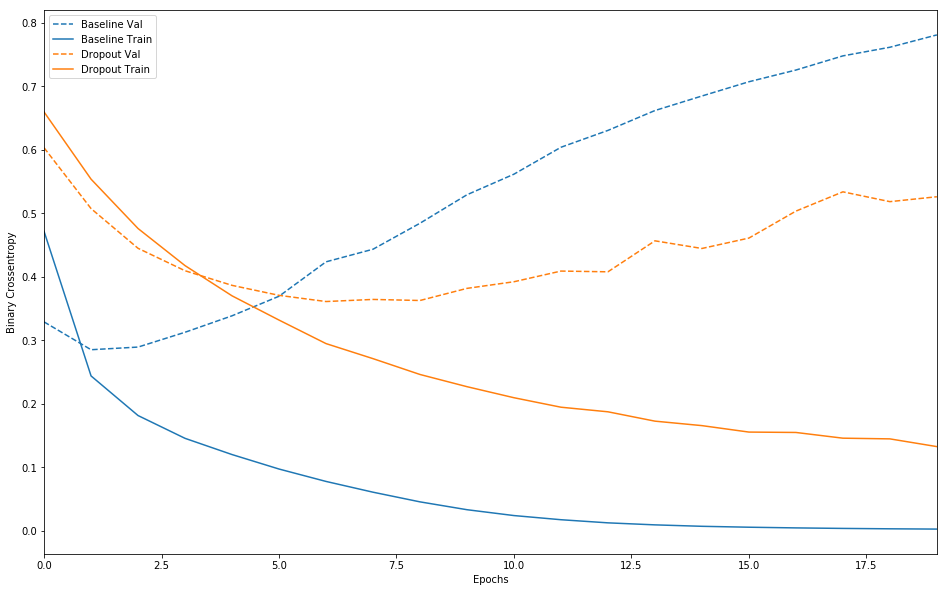

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])